# Project 2: Ames Housing Data and Kaggle Challenge
> By: Matthew Lio
---


Project notebook organisation:

# EDA & Cleaning
---

## Problem Statement

### Contents:
- [Background](#Background)
- [Library Imports](#Library-Imports)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis: Dataset 1](#Exploratory-Data-Analysis:-Dataset-1)
- [Data Visualization: Dataset 1](#Visualize-the-Data:-Dataset-1)
- [Exploratory Data Analysis: Dataset 2](#Exploratory-Data-Analysis:-Dataset-2)
- [Data Visualization: Dataset 2](#Visualize-the-Data:-Dataset-2)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Library Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import patsy

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.dummy import DummyRegressor

import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')

# %config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../datasets/train.csv')

In [3]:
train

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
0      NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
1      NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
2      NaN       Reg          Lvl    AllPub     Inside        Gtl   
3      NaN       Reg          Lvl    AllPub     Inside        Gtl   
4      NaN       IR1          Lvl    AllPub     Inside        Gtl   
...    ...       ...          ...       ...        ...        ...   
2046   NaN       IR1          HLS    AllPub     Inside        Gtl   
2047   NaN       IR1          Lvl    AllPub     Inside        Gtl   
2048   NaN       Reg          Bnk    AllPub     Inside        Gtl   
2049   NaN       Reg          Lvl    AllPub     Corner        Gtl   
2050   NaN       Reg          Lvl    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0          Sawyer        RRAe        Norm      1Fam      2Story             6   
1         SawyerW        Norm        Norm      1Fam      2Story             7   
2           NAmes        Norm        Norm      1Fam      1Story             5   
3          Timber        Norm        Norm      1Fam      2Story             5   
4         SawyerW        Norm        Norm      1Fam      1.5Fin             6   
...           ...         ...         ...       ...         ...           ...   
2046       Timber        Norm        Norm      1Fam      1Story             8   
2047      Edwards        Norm        Norm      1Fam      1Story             4   
2048      Crawfor        Norm        Norm      1Fam      1.5Fin             6   
2049        NAmes        Norm        Norm      1Fam      1Story             4   
2050      Gilbert        Norm        Norm      1Fam      2Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2046             5        2007            2007      Gable   CompShg   
2047             5        1940            1950      Gable   CompShg   
2048             6        1928            1950      Gable   CompShg   
2049             5        1956            1956      Gable   CompShg   
2050             5        1999            1999      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### Renaming dataframe columns

In [5]:
# make columns lowercase and replacing spaces with underscores
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '_')

print(train.columns)
train.head(2)

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   

   kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
0              1           Gd              6        Typ           0   
1              1           Gd              8        Typ           1   

  fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  \
0          NaN      Attchd         1976.0           RFn          2.0   
1           TA      Attchd         1997.0           RFn          2.0   

   garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
0        475.0          TA          TA           Y             0   
1        559.0          TA          TA           Y             0   

   open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area pool_qc  \
0             44               0           0             0          0     NaN   
1             74               0           0             0          0     NaN   

  fence misc_feature  misc_val  mo_sold  yr_sold sale_type  saleprice  
0   NaN          NaN         0        3     2010       WD      130500  
1   NaN          NaN         0        4     2009       WD      220000

### Summary Statistics ([data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))

The 2051 houses recorded in this dataset were built from 1872 to 2010. The transactions recorded were from 2006 to 2010.

Firstly, let us take a look at the sale price we are dealing with. The average price (`saleprice`) for the houses sold in this period was \\$181470 (presumably in USD), with standard deviation (SD) of $7926. The cheapest house sold was \\$12789, while the most expensive was \\$611657.

Next, we look at the areas of different parts of the property as well as number of rooms.

The average lot area (`lot_area`), or total area of the property, was 10,065 square feet (sf), with SD of 6742 sf. The smallest property area was 1300 sf, while the largest property area was 159,000 sf.

The average living area (`gr_liv_area`) was 1499 sf, with SD of 500 sf. The smallest house had 334 sf and the largest had 5642 sf. More than 50% of houses did not have a second floor, as shown in the 50% percentile.

The mean total basement area (`total_bsmt_sf`) was 1058 sf, with SD of 449 sf. However, the mean is affected by houses with no basement, represented as 0 sf. The largest basement was 6110 sf.

The average garage area (`garage_area`) was 474 sf, with SD of 216. Again, the mean is affected by houses with no garage represented as 0 sf. The largest garage was 1418 sf.

The average total number of rooms in a house (`totrms_abvgrd`) was 6.44. The smallest house had 2 rooms, while the largest had 15.

In [6]:
train.describe().T

count          mean           std          min          25%  \
id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
pid              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
ms_subclass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
lot_frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
lot_area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
overall_qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
overall_cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
year_built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
year_remod/add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
mas_vnr_area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
bsmtfin_sf_1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
bsmtfin_sf_2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
bsmt_unf_sf      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
total_bsmt_sf    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st_flr_sf       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd_flr_sf       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
low_qual_fin_sf  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
gr_liv_area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
bsmt_full_bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
bsmt_half_bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
full_bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
half_bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
bedroom_abvgr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
kitchen_abvgr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
totrms_abvgrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
garage_yr_blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
garage_cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
garage_area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
wood_deck_sf     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
open_porch_sf    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
enclosed_porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3ssn_porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
screen_porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
pool_area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
misc_val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
mo_sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
yr_sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
id                    1486.0  2.198000e+03       2930.0  
pid              535453200.0  9.071801e+08  924152030.0  
ms_subclass             50.0  7.000000e+01        190.0  
lot_frontage            68.0  8.000000e+01        313.0  
lot_area              9430.0  1.151350e+04     159000.0  
overall_qual             6.0  7.000000e+00         10.0  
overall_cond             5.0  6.000000e+00          9.0  
year_built            1974.0  2.001000e+03       2010.0  
year_remod/add        1993.0  2.004000e+03       2010.0  
mas_vnr_area             0.0  1.610000e+02       1600.0  
bsmtfin_sf_1           368.0  7.337500e+02       5644.0  
bsmtfin_sf_2             0.0  0.000000e+00       1474.0  
bsmt_unf_sf            

### Null Values

There are 26 columns with null values. With reference to the data dictionary, some of the null values for categorical columns with unique values most likely represent houses without those features (e.g. no basement, garage or fireplace). Some of these null values correspond to numerical columns showing the area of those features, like houses without masonry veneer also have null values for masonry veneer area.

We will further explore the data to see what we can fill these null values with.

In [7]:
# showing null value counts and percentage of null values for each column
nulldf = pd.DataFrame(train.isnull().sum(), columns = ['null_count'])
nulldf['null_pct'] = train.isnull().sum()/2051*100
nulldf = nulldf[nulldf['null_count'] != 0]

print(nulldf.shape)
nulldf

(26, 2)


null_count   null_pct
lot_frontage           330  16.089712
alley                 1911  93.174061
mas_vnr_type            22   1.072647
mas_vnr_area            22   1.072647
bsmt_qual               55   2.681619
bsmt_cond               55   2.681619
bsmt_exposure           58   2.827889
bsmtfin_type_1          55   2.681619
bsmtfin_sf_1             1   0.048757
bsmtfin_type_2          56   2.730375
bsmtfin_sf_2             1   0.048757
bsmt_unf_sf              1   0.048757
total_bsmt_sf            1   0.048757
bsmt_full_bath           2   0.097513
bsmt_half_bath           2   0.097513
fireplace_qu          1000  48.756704
garage_type            113   5.509508
garage_yr_blt          114   5.558264
garage_finish          114   5.558264
garage_cars              1   0.048757
garage_area              1   0.048757
garage_qual            114   5.558264
garage_cond            114   5.558264
pool_qc               2042  99.561190
fence                 1651  80.497318
misc_feature          1986  96.830814

In [8]:
# percentage of missing values for all columns
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

id - 0.0%
pid - 0.0%
ms_subclass - 0.0%
ms_zoning - 0.0%
lot_frontage - 16.089712335446123%
lot_area - 0.0%
street - 0.0%
alley - 93.1740614334471%
lot_shape - 0.0%
land_contour - 0.0%
utilities - 0.0%
lot_config - 0.0%
land_slope - 0.0%
neighborhood - 0.0%
condition_1 - 0.0%
condition_2 - 0.0%
bldg_type - 0.0%
house_style - 0.0%
overall_qual - 0.0%
overall_cond - 0.0%
year_built - 0.0%
year_remod/add - 0.0%
roof_style - 0.0%
roof_matl - 0.0%
exterior_1st - 0.0%
exterior_2nd - 0.0%
mas_vnr_type - 1.0726474890297415%
mas_vnr_area - 1.0726474890297415%
exter_qual - 0.0%
exter_cond - 0.0%
foundation - 0.0%
bsmt_qual - 2.681618722574354%
bsmt_cond - 2.681618722574354%
bsmt_exposure - 2.8278888347147735%
bsmtfin_type_1 - 2.681618722574354%
bsmtfin_sf_1 - 0.04875670404680643%
bsmtfin_type_2 - 2.7303754266211606%
bsmtfin_sf_2 - 0.04875670404680643%
bsmt_unf_sf - 0.04875670404680643%
total_bsmt_sf - 0.04875670404680643%
heating - 0.0%
heating_qc - 0.0%
central_air - 0.0%
electrical - 0.0%
1st_

Below shows the heatmap for null values to visualize where the null values are for each column.

<AxesSubplot:>

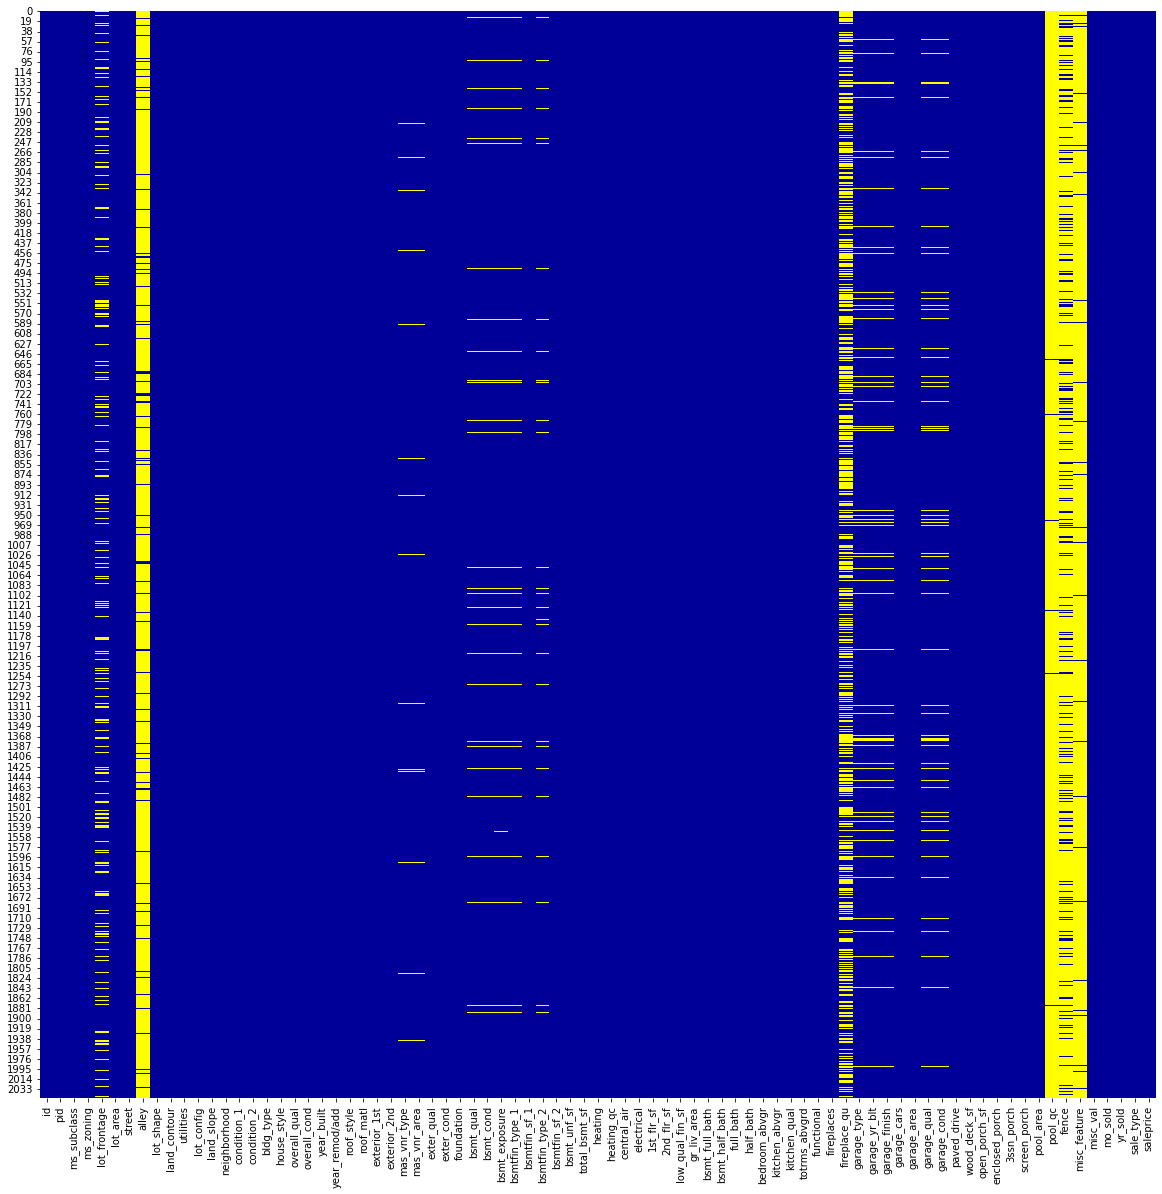

In [9]:
# heatmap to show where the null values are
plt.figure(figsize = (20, 20))
cols = train.columns[:] # choosing the columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours), cbar = False)

## EDA

### Distribution and scatter plots (vs saleprice) for numerical variables

In [10]:
# function to plot histogram, boxplot and scatterplot for all numerical variables
def numeric_col_plots(df, col_list):
    nrows = len(col_list)
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize=(20, nrows*5))
    ax = ax.ravel()
    for i, col in enumerate(col_list):
        sns.distplot(df[col], ax = ax[i*3-3], fit = stats.norm)
        ax[i*3-3].set_title(f'{col} distribution',fontsize=14)
        ax[i*3-3].tick_params(labelsize=12)
        ax[i*3-3].set_xlabel(col, fontsize=14)
        
        sns.boxplot(df[col], width = 0.2, ax = ax[i*3-2])
        ax[i*3-2].set_title(f'{col} boxplot',fontsize=14)
        ax[i*3-2].tick_params(labelsize=12)
        ax[i*3-2].set_xlabel(col, fontsize=14)
        
        sns.regplot(data=df, x=df[col], y=df['saleprice'],ax = ax[i*3-1],
                    scatter_kws={'edgecolor':'white'}, line_kws = {'color':'grey'})
        ax[i*3-1].set_title(f'{col} vs saleprice', fontsize=14)
        ax[i*3-1].tick_params(labelsize=12)
        ax[i*3-1].set_xlabel(col, fontsize=14)
        
    plt.tight_layout()

In [11]:
# list with only numerical columns
col_numerical = [col for col in train.columns if train[col].dtype != np.object]

# list with only categorical columns
col_categorical = [col for col in train.columns if col not in col_numerical]

# preliminary filling of null values so the features can be visualised
train_copy = train.copy()
for col in col_numerical:
    train_copy[col] = train_copy[col].fillna(0.0)
for col in col_categorical:
    train_copy[col] = train_copy[col].fillna('None')

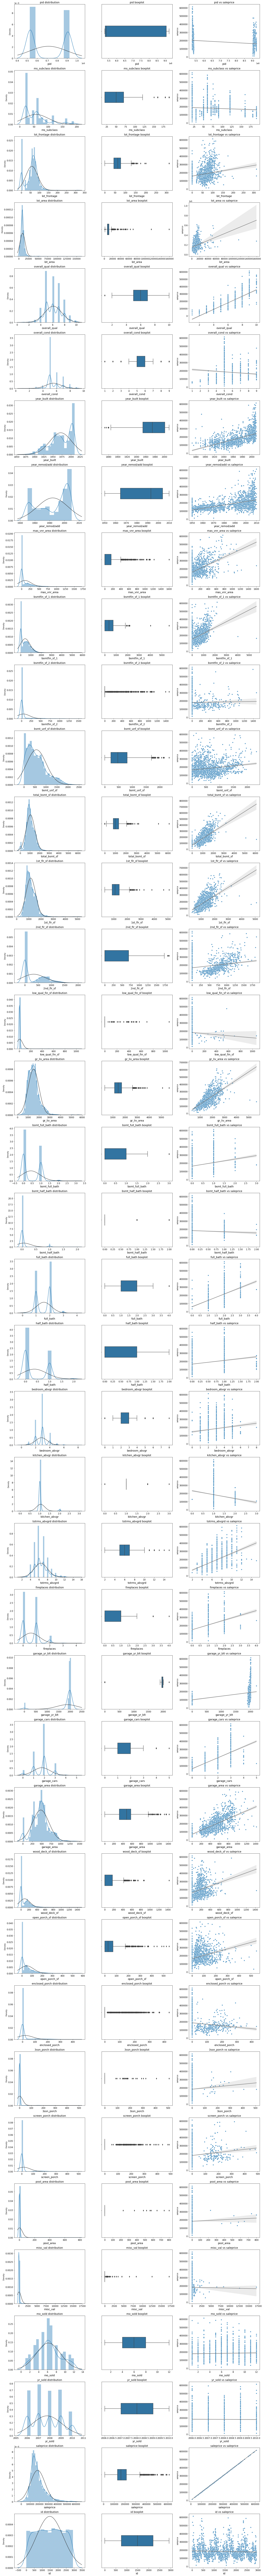

In [12]:
numeric_col_plots(train_copy, col_numerical)

### Distribution and boxplots (vs saleprice) for categorical variables

In [13]:
# function to plot histogram and boxplot for all categorical variables
def categorical_col_plots(df, col_list):
    nrows = len(col_list)
    fig, ax = plt.subplots(nrows = nrows, ncols = 2, figsize=(20, nrows*5))
    ax = ax.ravel()
    for i, col in enumerate(col_list):
        sns.histplot(df[col], ax = ax[i*2-2])
        ax[i*2-2].set_title(f'{col} distribution',fontsize=14)
        ax[i*2-2].tick_params(labelsize=12)
        ax[i*2-2].set_xlabel(col, fontsize=14)
        
        sns.boxplot(x = df[col], y = df['saleprice'], ax = ax[i*2-1])
        ax[i*2-1].set_title(f'{col} vs saleprice',fontsize=14)
        ax[i*2-1].tick_params(labelsize=12)
        ax[i*2-1].set_xlabel(col, fontsize=14)
        
    plt.tight_layout()

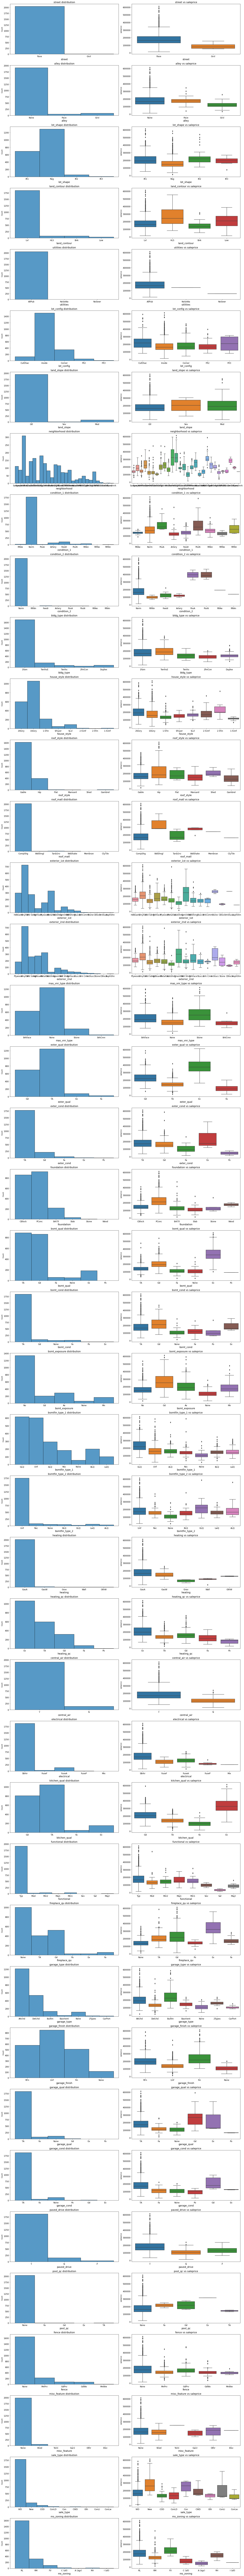

In [14]:
categorical_col_plots(train_copy, col_categorical)

In [15]:
train['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: misc_feature, dtype: int64

### General EDA findings

From the general analysis done above for all columns with distribution plots, boxplots and scatter plots, here are some of the findings:

**`id`** (int64, discrete): Observation number or ID number for the houses. We will be keeping this column for house identification.

**`pid`** (int64, nominal): This column is unnecessary to our analysis, as they are merely parcel identification numbers for the houses, and will not affect the sale price of the houses. **Drop column.**

**`ms_subclass`** (int64, but should be object): A housing classification column that categorizes houses by type. Each numeric variable stands for a specific type of housing. This column would be more suitable as an object data type instead of int64, as it is considered categorical. **Convert to categorical.**

**`ms_zoning`** (object, nominal): A categorical column that identifies the general zoning classification of the houses. There is clear differentiation between zone categorizations vs sale price.

**`lot_frontage`** (float64, continuous): Out of the columns that describe the lot of the property, only lot frontage has missing values. Lot frontage is the width of a lot, measured at the front part or face of the lot, facing the street. There are 330 null values for this column. We will first drop the outliers. For filling up the null values, we will be using Iterative Imputer from sklearn, with linear regression as an estimator method, with the help of other lot features. **Further analysis needed.**

**`lot_area`** (int64, continuous): The lot size, or area of the entire property, in square feet. As expected, the size of the property is somewhat positively correlated to the sale price, larger the lot, higher the price. Outliers will be dropped. **Drop outliers.**

**`street`** (object, nominal): Type of road access to property. This column will be dropped as 99.7% are the same value. **Drop column.**

**`alley`** (object, nominal): Type of alley access to property. This column will be dropped as 93.2% are null values. **Drop column.**

**`lot_shape`** (object, ordinal): General shape of property. Majority of the property areas are of a regular shape, with some slightly irregular as well. Very irregular-shaped lot areas are rare. Interestingly, the boxplot shows that regular-shaped lots have slightly lower median and range in terms of sale price as compared to the other irregular categories. The reason could be their prices were heavily affected by other features, and since regularly-shaped properties are the majority, these other features lowered their overall price range. However, we are not sure if sale prices are driven up the more regular the lots are, or the more irregular the lots are. Thus, it is important to convert this column to ordinal numeric columns and check the correlation of this feature with sale price. **Convert to ordinal numeric values, further analysis on correlation with sale price.**

**`land_contour`** (object, nominal): Flatness of the property. Most property had land that are leveled, with only a few exceptions. The houses with land that are leveled also had sale prices lower than the others, but the reason most likely is the same as the shape of the lot, where their prices were heavily influenced by other features, and being the majority, skewed their price to lower than houses in the other categories. With 89.9% with the same value, this feature will be dropped. **Drop column.**

**`utilities`** (object, ordinal): Type of utilities available. This column will be dropped as 99.9% are the same value. **Drop column.**

**`lot_config`** (object, nominal): Lot configuration. Most houses are inside lots. It seems like there were some differentiation in prices according to what kind of lot configuration the houses have.

**`land_slope`** (object, ordinal): Slope of property. Property with gentle slopes are presumed to be preferred by buyers, and hence would have a higher sale price than property with severe slopes. However, the boxplot shows that property with gentle slopes have price ranges lower than property with moderate to severe slopes. This may be due to the majority of property having gentle slopes, and the price were most likely heavily affected by other features. This could affect model accuracy. With 95% with the same value, we will be dropping this column. **Drop column.**

**`neighborhood`** (object, nominal): Physical locations within Ames city limits. As expected, neighborhood is a good predictor of sale price.

**`condition_1`** (object, nominal): Proximity to various conditions. Seems like prices were affected for houses with access to certain conditions.

**`condition_2`** (object, nominal): An extra column for conditions, if there are more than 1. Shares the same values as `condition_1`. This column will be dropped as 98.7% are the same value. **Drop column.**

**`bldg_type`** (object, nominal): Type of dwelling. Even though most houses are of a single value, the minority values most likely would affect the sale price.

**`house_style`** (object, nominal): Style of dwelling. House style could be a good predictor of house sale price.

**`overall_qual`** (int64, ordinal): Rates the overall material and finish of the house. As expected, the higher the quality of the house, the higher the sale price, as the scatter plot shows a somewhat linear relationship between quality and sale price.

**`overall_cond`** (int64, ordinal): Rates the overall condition of the house. From the scatter plot, most of the houses were rated 5 for the condition of their house. However, what makes this column so confusing is that it shows a negative correlation with sale price, where the 'better' the condition of the house, the 'lower' the sale price. This is simply untrue, and we can only assume this negative correlation could be due to the influence of other features. For the sake of model accuracy, this column will be dropped. **Drop column.**

**`year_built`** (int64, discrete): Original construction date. The plots for this column shows a trend where the newer the houses, the more expensive it is. The construction date has a linear relationship with sale price. With `yr_sold`, we could find out the age of the house when it was sold, make a new column and explore the correlation with sale price. **Create new column age_sold and explore correlation with sale price.**

**`year_remod/add`** (int64, discrete): Remodel date (same as construction date if no remodeling or additions). The distribution for this column shows a somewhat bimodal shape. There are many values at 1950, which we suspect it might be because some of these houses were actually remodeled before 1950, but for some reason, 1950 was set as a cutoff year for the data in this column. Furthermore, we suspect that if a house is not remodeled, it might share the same values as `year_built`, thus double counting the values. In order to still retain information for this, we will create a new column that states if the houses were remodeled or not, and explore that correlation with sale price. **Further analysis needed. Create new yes/no column if the houses were remodeled, then drop this column.**

**`roof_style`** (object, nominal): Type of roof. Most houses have a gable roof style.

**`roof_matl`** (object, nominal): Roof material. This column will be dropped as 98.7% are the same value. **Drop column.**

**`exterior_1st`** (object, nominal): Exterior covering on house. Values are quite distributed, with 'Vinyl Siding' being the most popular. The differentiation when comparing with sale price also shows quite a diverse difference. **Further analysis needed due to having exterior_2nd.**

**`exterior_2nd`** (object, nominal): Exterior covering on house (if more than one material). Shares the same variables as `exterior_1st`. We suspect there might be houses with only 1 material for this feature, thus having the same value as `exterior_1st`. This might multiply the effect which may affect the accuracy of the model if we include both columns. These 2 'exterior' columns need further analysis. **Further analysis needed due to having exterior_2nd.**

**`mas_vnr_type`** (object, nominal): Masonry veneer type. Contains 22 null values, which we suspect is due to those houses not having any masonry veneer, but was not correctly given the value 'None'. We will fill in the null values with 'None'. **Fill in null values with 'None'.**

**`mas_vnr_area`** (float64, continuous): Masonry veneer area in square feet. Contains 22 null values, which we suspect is due to those houses not having any masonry veneer, but was not correctly given the value 0.0. We will fill in the null values with 0.0. **Fill in null values with 0.0.**

**`exter_qual`** (object, ordinal): Evaluates the quality of the material on the exterior. Nothing too out of the ordinary here, as it makes sense for the sale price to be higher the better the quality of the material. Will be converting to ordinal numerical values. **Convert to ordinal numeric values.**

**`exter_cond`** (object, ordinal): Evaluates the present condition of the material on the exterior. Unlike `exter_qual`, the boxplots here do not show a very clear increase in sale price the better the exterior condition. Moreover, with 86.7% of them same value, we will be dropping this column. **Drop column.**

**`foundation`** (object, nominal): Type of foundation. Most houses' foundations are either 'Cinder Block' or 'Poured Concrete'. Could be useful to include in the model.

**`bsmt_qual`** (object, ordinal): Evaluates the height of the basement. There are 55 null values here, same as `bsmt_cond`, which may most likely mean no basement. Boxplots show that the better the basement quality/height, the higher the sale price, which is good. Nevertheless it will be converted to ordinal numeric values for a clearer representation of correlation with sale price. We need to also check if null values correspond with `bsmt_cond`. **Convert to ordinal numeric values, further analysis needed.**

**`bsmt_cond`** (object, ordinal): Evaluates the general condition of the basement. There are 55 null values here, same as `bsmt_qual`, which may most likely mean no basement. Boxplots do not show a clear correlation with sale price. We will convert this to ordinal numeric values and evaluate again. Need to also see if the null values correpond with `bsmt_qual`. **Convert to ordinal numeric values, further analysis needed. May drop.**

**`bsmt_exposure`** (object, ordinal): Refers to walkout or garden level walls. 58 null values here which may mean no basement. Boxplots show the better the exposure, the higher the sale price. We will be converting this to ordinal numeric values for a better representaion of correlation with sale price. **Convert to ordinal numeric values, further analysis needed.**

**`bsmtfin_type_1`** (object, ordinal): Rating of basement finished area. 55 null values here, which may most likely mean no basement. Boxplots do not show a very clear correlation with sale price. We will be converting the values to ordinal numeric values. **Convert to ordinal numeric values, further analysis needed.**

**`bsmtfin_sf_1`** (float64, continuous): Type 1 finished square feet. 1 null value here, which may mean no basement. The scatter plot shows a positive correlation with sale price. However, we will be dropping this column as we will be using `total_bsmt_sf` for the basement area, and we do not want to "double count" any area of the basement. **Drop column.**

**`bsmtfin_type_2`** (object, ordinal): Rating of basement finished area (if multiple types). 56 null values here which may mean no basement. Boxplots do not show a very clear correlation with sale price. In addition, most values are 'Unfinished', yet it does not seem to have a major effect on sale price. We will be converting the values to ordinal numeric values. **Convert to ordinal numeric values, further analysis needed. May drop.**

**`bsmtfin_sf_2`** (float64, continuous): Type 2 finished square feet. 1 null value here which may mean no basement. We will be dropping this column as we will be using `total_bsmt_sf` for the basement area, and we do not want to "double count" any area of the basement. **Drop column.**

**`bsmt_unf_sf`** (float64, continuous): Unfinished square feet of basement area. 1 null value here which may mean no basement. We will be dropping this column as we will be using `total_bsmt_sf` for the basement area, and we do not want to "double count" any area of the basement. **Drop column.**

**`total_bsmt_sf`** (float64, continuous): Total square feet of basement area. 1 null value here which may mean no basement. Scatter plot shows a very positive correlation with sale price, which is expected. **Remove outliers, further analysis needed.**

**`heating`** (object, nominal): Type of heating. This column will be dropped as 98.4% are the same value. **Drop column.**

**`heating_qc`** (object, ordinal): Heating quality and condition. Boxplots show a good differentiation in sale price based on the quality of the heating. We will be converting this to ordinal numeric values for a better representation of correlation with sale price. **Convert to ordinal numeric values.**

**`central_air`** (object, nominal): Central air conditioning. From the boxplot, it seems like houses with central air conditioning had higher sale price than houses without.

**`electrical`** (object, ordinal): Description of the electrical system in the houses. Majority of houses have 'Standard Circuit Breakers & Romex'. From the boxplots, it also seems like the better the electrical system, the higher the sale price of the houses, which makes sense. We will be converting this to ordinal numeric values for a better representation of the correlation with sale price. **Convert to ordinal numeric values.**

**`1st_flr_sf`** (int64, continuous): First floor square feet. Since both `1st_flr_sf` and `2nd_flr_sf` are part of `gr_liv_area`, we just need `gr_liv_area`, making these 2 columns redundant as we do not want to double count the areas. **Drop column.**

**`2nd_flr_sf`** (int64, continuous): Second floor square feet. Since both `1st_flr_sf` and `2nd_flr_sf` are part of `gr_liv_area`, we just need `gr_liv_area`, making these 2 columns redundant as we do not want to double count the areas. **Drop column.**

**`low_qual_fin_sf`** (int64, continuous): Low quality finished areas in the house, in square feet (all floors). With 98.4% of the values at 0, it is telling us that most houses do not have low quality areas. The ones that do, affected their sale price negatively. This is an interesting feature and may be good to include in our model as it predicts lower prices for houses, if they do have low quality areas.

**`gr_liv_area`** (int64, continuous): Above grade (ground) living area square feet. The scatter plot shows what we expect, where the larger the living area, the higher the sale price. This column also eliminates the need for `1st_flr_sf` and `2nd_flr_sf`, as the two columns are part of `gr_liv_area`. Outliers will have to be removed first. **Remove outliers.**

**`bsmt_full_bath`** (float64, discrete): The number of basement full bathrooms. 2 null values, which we can fill in as 0, no basement full bathrooms. It seems like a slight positive correlation with sale price. **Fill null values with 0.**

**`bsmt_half_bath`** (float64, discrete): The number of basement half bathrooms. 2 null values, which we can fill in as 0, no basement half bathrooms. This is a confusing column, where the graphs show a negative correlation with sale price. In reality, should this feature positively or negatively correlate with sale price? With `bsmt_full_bath`, the data in this column may also cause a clash of information and thus model inaccuracy, even so when 93.8% of the values are 0. Thus we will drop this column. **Drop column.**

**`full_bath`** (int64, discrete): Number of full bathrooms above grade. As expected, the more full bathrooms there are, the higher the sale price.

**`half_bath`** (int64, discrete): Number of half bathrooms above grade. This feature is somewhat positively correlated with sale price.

**`bedroom_abvgr`** (int64, discrete): Number of bedrooms above grade (does NOT include basement bedrooms). Expectedly positively correlated with sale price.

**`kitchen_abvgr`** (int64, discrete): Number of kitchens above grade. Interestingly, this feature is negatively correlated with sale price.

**`kitchen_qual`** (object, ordinal): Kitchen quality. The boxplots show a very clear differentiation of kitchen quality when it comes to sale price. Definitely including this into the model, after converting the values to ordinal numeric values. **Convert to ordinal numeric values.**

**`totrms_abvgrd`** (int64, discrete): Total rooms above grade (does not include bathrooms). This column will be dropped as it is collinear with `gr_liv_area`. **Drop column.**

**`functional`** (object, ordinal): Home functionality (Assume typical unless deductions are warranted). Most houses have 'Typical Functionality'. For those with some deductions or damages, their sale prices were lower. This is good to include in the model to penalise those houses with deductions or damages. This will be converted to ordinal numeric values for better representation of correlation with sale price. **Convert to ordinal numeric values.**

**`fireplaces`** (int64, discrete): Number of fireplaces. Positive correlation with sale price.

**`fireplace_qu`** (object, ordinal): Fireplace quality. 1000 null values here, which we can fill in with 0 (after conversion to ordinal numeric). Boxplots show what we expected where better quality fireplaces have slightly higher sale price than fireplaces with poorer quality. Need to convert to ordinal numeric values. **Convert to ordinal numeric values, fill in null values with 0.**

**`garage_type`** (object, nominal): Garage location. 113 locations here which we can fill in with 'None' (no garage). **Fill null values with 'None'.**

**`garage_yr_blt`** (float64, discrete): Year garage was built. 114 null values. This is a confusing column. Houses with no garage, the value will be 0. Houses with garage built the same year as the house, the value will be the same as `year_built`. This column will be dropped. **Drop column.**

**`garage_finish`** (object, ordinal): Interior finish of the garage. 114 null values, which we can input as 0 (after conversion to ordinal numeric). Boxplots show what we expected, where better finish of the garage have slightly higher sale price. Need to convert to ordinal numeric values. **Convert to ordinal numeric values.**

**`garage_cars`** (float64, discrete): Size of garage in car capacity. 1 null value. This column will be dropped as it is collinear with `garage_area`. **Drop column.**

**`garage_area`** (float64, continuous): Size of garage in square feet. 1 null value which we can input as 0. Scatter plot shows what we expected where the larger the garage area, the higher the sale price. **Input single null value with 0.**

**`garage_qual`** (object, ordinal): Garage quality. 114 null values which we can input as 'None'. We will be converting this to ordinal numeric values. **Convert to ordinal numeric values.**

**`garage_cond`** (object, ordinal): Garage condition. 114 null values. We will be dropping this column as it seems to be almost the same as `garage_qual`. **Drop column.**

**`paved_drive`** (object, ordinal): Paved driveway. **Convert to ordinal numeric values.**

**`wood_deck_sf`** (int64, continuous): Wood deck area in square feet. To remove outliers. **Remove outliers.**

**`open_porch_sf`** (int64, continuous): Open porch area in square feet. High number of houses with no open porch. We will be combining the area of all porches into one single feature: total porch area. We want to see if combining the features would create a greater significance in correlation to sale price. **Remove outliers. Combine area of all porches into one single feature. Check correlation.**

**`enclosed_porch`** (int64, continuous): Enclosed porch area in square feet. High number of houses with no enclosed porch. The scatter plot shows a negative correlation with sale price, which we are not sure if in reality, that should be the case. We will be combining the area of all porches into one single feature: total porch area. We want to see if combining the features would create a greater significance in correlation to sale price. **Remove outliers. Combine area of all porches into one single feature. Check correlation.**

**`3ssn_porch`** (int64, continuous): Three season porch area in square feet. High number of houses with no 3-season porch. We will be combining the area of all porches into one single feature: total porch area. We want to see if combining the features would create a greater significance in correlation to sale price. **Remove outliers. Combine area of all porches into one single feature. Check correlation.**

**`screen_porch`** (int64, continuous): Screen porch area in square feet. High number of houses with no screen porch. We will be combining the area of all porches into one single feature: total porch area. We want to see if combining the features would create a greater significance in correlation to sale price. **Remove outliers. Combine area of all porches into one single feature. Check correlation.**

**`pool_area`** (int64, continuous): Pool area in square feet. Only 9 houses have pools. Nevertheless, we will keep this feature as it still shows slight correlation with sale price.

**`pool_qc`** (object, ordinal): Pool quality. 2042 null values, which belong to all the houses without pools. We will be dropping this column as there are just too little values to make much of a difference. **Drop column.**

**`fence`** (object, ordinal): Fence quality. 1651 null values which we can input 0 (no fence, and after conversion to ordinal numeric). Convert to ordinal numeric too. **Convert to ordinal numeric, input 0 for null values.**

**`misc_feature`** (object, nominal): Miscellaneous feature not covered in other categories. 1986 null values (96.8% nulls). The information for this feature is very vague, with very little values. Thus we will convert this column into a yes: 1, no: 0 column. **Convert column to yes:1 or no:0.**

**`misc_val`** (int64, continuous): Value of miscellaneous feature. With so little houses with misc features, this column is much too vague, even showing a negative correlation with sale price. We will be dropping this column. **Drop column.**

**`mo_sold`** (int64, discrete): Month Sold (MM). The plots for this column are erroneous as they do not show the sale of the houses in a straight timeline. **Drop column.**

**`yr_sold`** (int64, discrete): Year Sold (YYYY). Almost 0 correlation with sale price during these 5 years (2006 to 2010) the houses were sold. However, we may be able to see if there is a correlation of age of the houses when they were sold with sale price. Create a new column with `year_built`. **Create new column age_sold and explore correlation with sale price.**

**`sale_type`** (object, nominal): Type of sale. This feature does not seem to be important or relevant to sale price. **Drop column.**

**`saleprice`** (int64, continuous): Sale price, the value we need to predict!

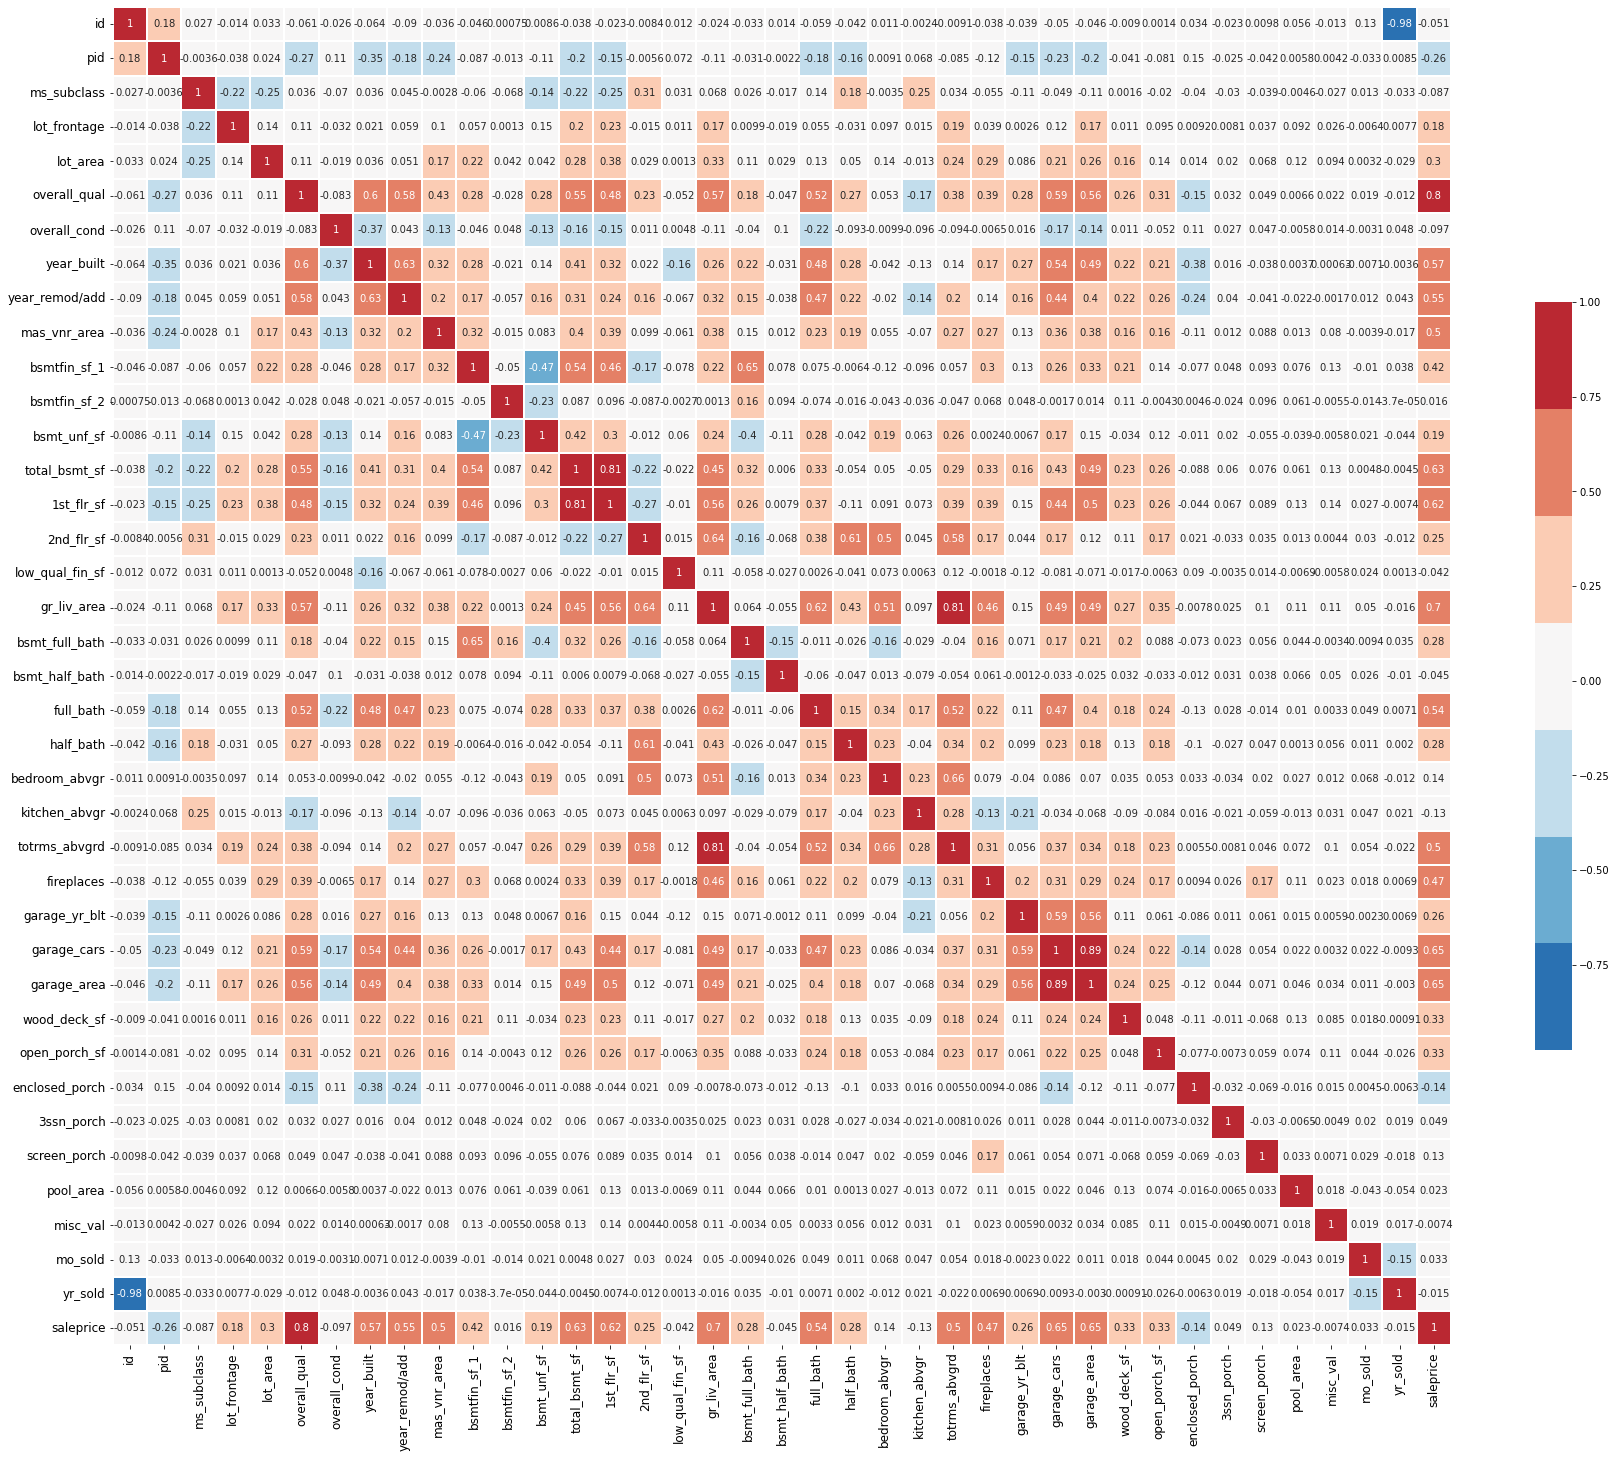

In [16]:
# heatmap to show correlation between numerical features
# most importantly is the correlation of these features with sale price
mask = np.zeros_like(train_copy.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(25, 22))
sns.heatmap(train_copy.corr(),
            mask = mask,
            square=True,
            linewidth=0.1,
            cbar_kws = {'shrink':0.5},
            cmap=sns.color_palette("RdBu_r", 7),
            annot = True)
ax.tick_params(labelsize=12)
plt.tight_layout()

In [17]:
nulldf

null_count   null_pct
lot_frontage           330  16.089712
alley                 1911  93.174061
mas_vnr_type            22   1.072647
mas_vnr_area            22   1.072647
bsmt_qual               55   2.681619
bsmt_cond               55   2.681619
bsmt_exposure           58   2.827889
bsmtfin_type_1          55   2.681619
bsmtfin_sf_1             1   0.048757
bsmtfin_type_2          56   2.730375
bsmtfin_sf_2             1   0.048757
bsmt_unf_sf              1   0.048757
total_bsmt_sf            1   0.048757
bsmt_full_bath           2   0.097513
bsmt_half_bath           2   0.097513
fireplace_qu          1000  48.756704
garage_type            113   5.509508
garage_yr_blt          114   5.558264
garage_finish          114   5.558264
garage_cars              1   0.048757
garage_area              1   0.048757
garage_qual            114   5.558264
garage_cond            114   5.558264
pool_qc               2042  99.561190
fence                 1651  80.497318
misc_feature          1986  96.830814